<a href="https://colab.research.google.com/github/guilhermelaviola/MovieRatingAnalysis/blob/main/IMDbWatchlistStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing all the necessary libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style = 'darkgrid')
plt.style.use('seaborn-pastel')

<ipython-input-1-88ff570e2e2d>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


In [2]:
# Importing the dataset and displying the first 10 rows:
df = pd.read_excel('WATCHLIST.xlsx')
df.head()

,Created,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors
0,2024-04-11,The Narrow Margin,movie,7.6,71,1952,"Crime, Drama, Film-Noir, Thriller",8658,1952-04-23,"Richard Fleischer, William Cameron Menzies"
1,2020-04-29,The Great Dictator,movie,8.4,125,1940,"Comedy, Drama, War",237408,1940-10-15,Charles Chaplin
2,2023-01-31,The Set-Up,movie,7.8,73,1949,"Crime, Film-Noir, Sport",10088,1949-03-29,Robert Wise
3,2024-04-18,Brian's Song,tvMovie,7.5,73,1971,"Biography, Drama, Sport",8869,1971-11-30,Buzz Kulik
4,2021-11-07,Cinderella,movie,7.3,74,1950,"Animation, Family, Fantasy, Musical, Romance",174007,1950-02-15,"Hamilton Luske, Clyde Geronimi, Wilfred Jackson"


In [3]:
# Displaying the number of rows and columns in the dataset:
df.shape

(806, 10)

In [4]:
# Displaying the datatypes of each column:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 806 entries, 0 to 805
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Created         806 non-null    datetime64[ns]
 1   Title           806 non-null    object        
 2   Title Type      806 non-null    object        
 3   IMDb Rating     806 non-null    float64       
 4   Runtime (mins)  806 non-null    int64         
 5   Year            806 non-null    int64         
 6   Genres          806 non-null    object        
 7   Num Votes       806 non-null    int64         
 8   Release Date    806 non-null    datetime64[ns]
 9   Directors       802 non-null    object        
dtypes: datetime64[ns](2), float64(1), int64(3), object(4)
memory usage: 63.1+ KB


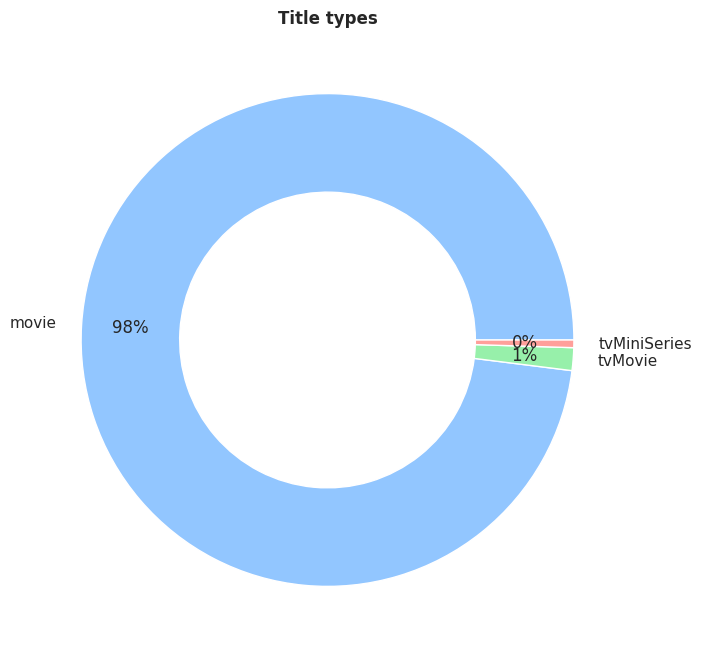

In [5]:
# Displaying the title types present in the dataset:
df['Title Type'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Title types', fontweight = 'bold')
plt.show()

In [11]:
# Creating a datetime object based on the dates from the dataset:
df['Created'] = df['Created'].map(pd.to_datetime)
df['Day Created'] = df['Created'].apply(lambda x : x.day)
df['Month Created'] = df['Created'].apply(lambda x : x.month)
df['Year Created'] = df['Created'].apply(lambda x : x.year)
df['Weekday Created'] = df['Created'].apply(lambda x : x.weekday())

# Displaying the datatypes of each column:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 806 entries, 0 to 805
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Created          806 non-null    datetime64[ns]
 1   Title            806 non-null    object        
 2   Title Type       806 non-null    object        
 3   IMDb Rating      806 non-null    float64       
 4   Runtime (mins)   806 non-null    int64         
 5   Year             806 non-null    int64         
 6   Genres           806 non-null    object        
 7   Num Votes        806 non-null    int64         
 8   Release Date     806 non-null    datetime64[ns]
 9   Directors        802 non-null    object        
 10  Day Created      806 non-null    int64         
 11  Month Created    806 non-null    int64         
 12  Year Created     806 non-null    int64         
 13  Weekday Created  806 non-null    int64         
dtypes: datetime64[ns](2), float64(1), int64(7)

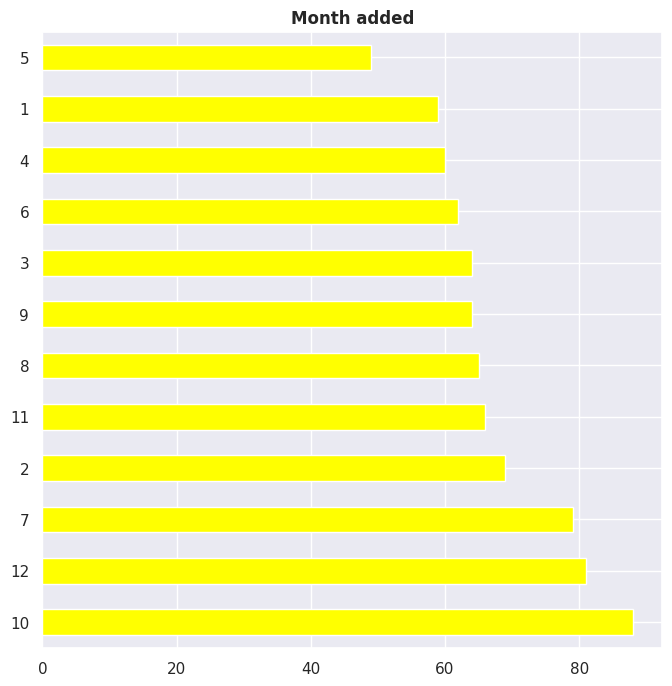

In [12]:
# Displaying distibution of months in which movies were added to the dataset:
df['Month Created'].value_counts().plot(kind = 'barh', color = 'yellow', figsize = (8, 8))
plt.ylabel(None)
plt.title('Month added', fontweight = 'bold')
plt.show()

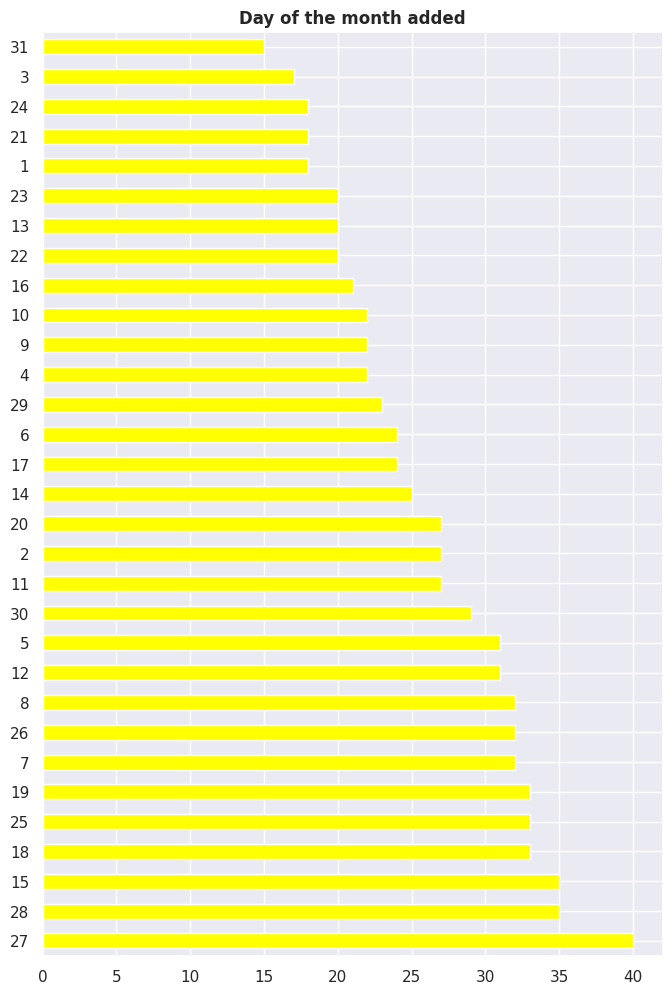

In [13]:
# Displaying distibution of days in which movies were added to the dataset:
df['Day Created'].value_counts().plot(kind = 'barh', color = 'yellow', figsize = (8, 12))
plt.ylabel(None)
plt.title('Day of the month added', fontweight = 'bold')
plt.show()

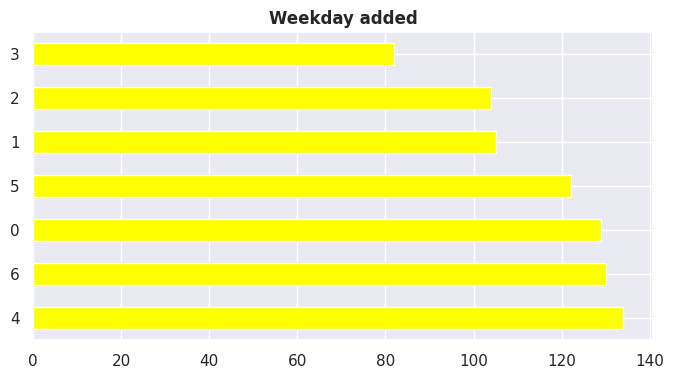

In [14]:
# Displaying distibution of weekdays in which movies were added to the dataset:
df['Weekday Created'].value_counts().plot(kind = 'barh', color = 'yellow', figsize = (8, 4))
plt.ylabel(None)
plt.title('Weekday added', fontweight = 'bold')
plt.show()

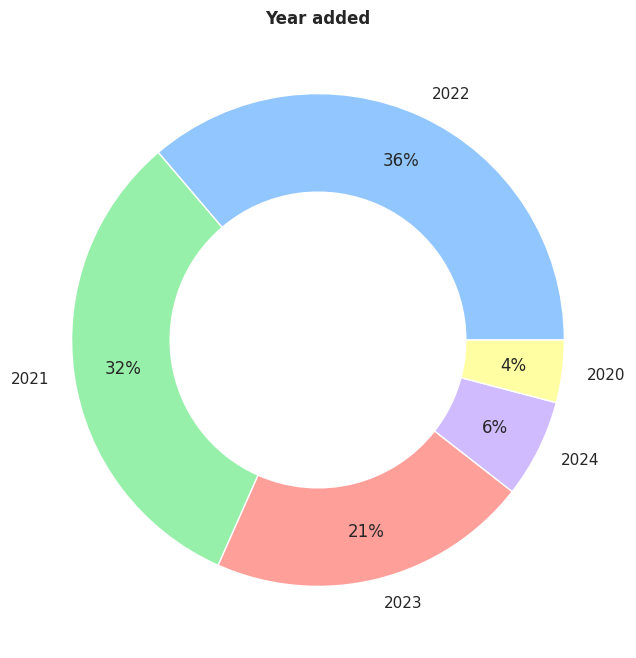

In [15]:
# Displaying distibution of years in which movies were added to the dataset:
df['Year Created'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Year added', fontweight = 'bold')
plt.show()

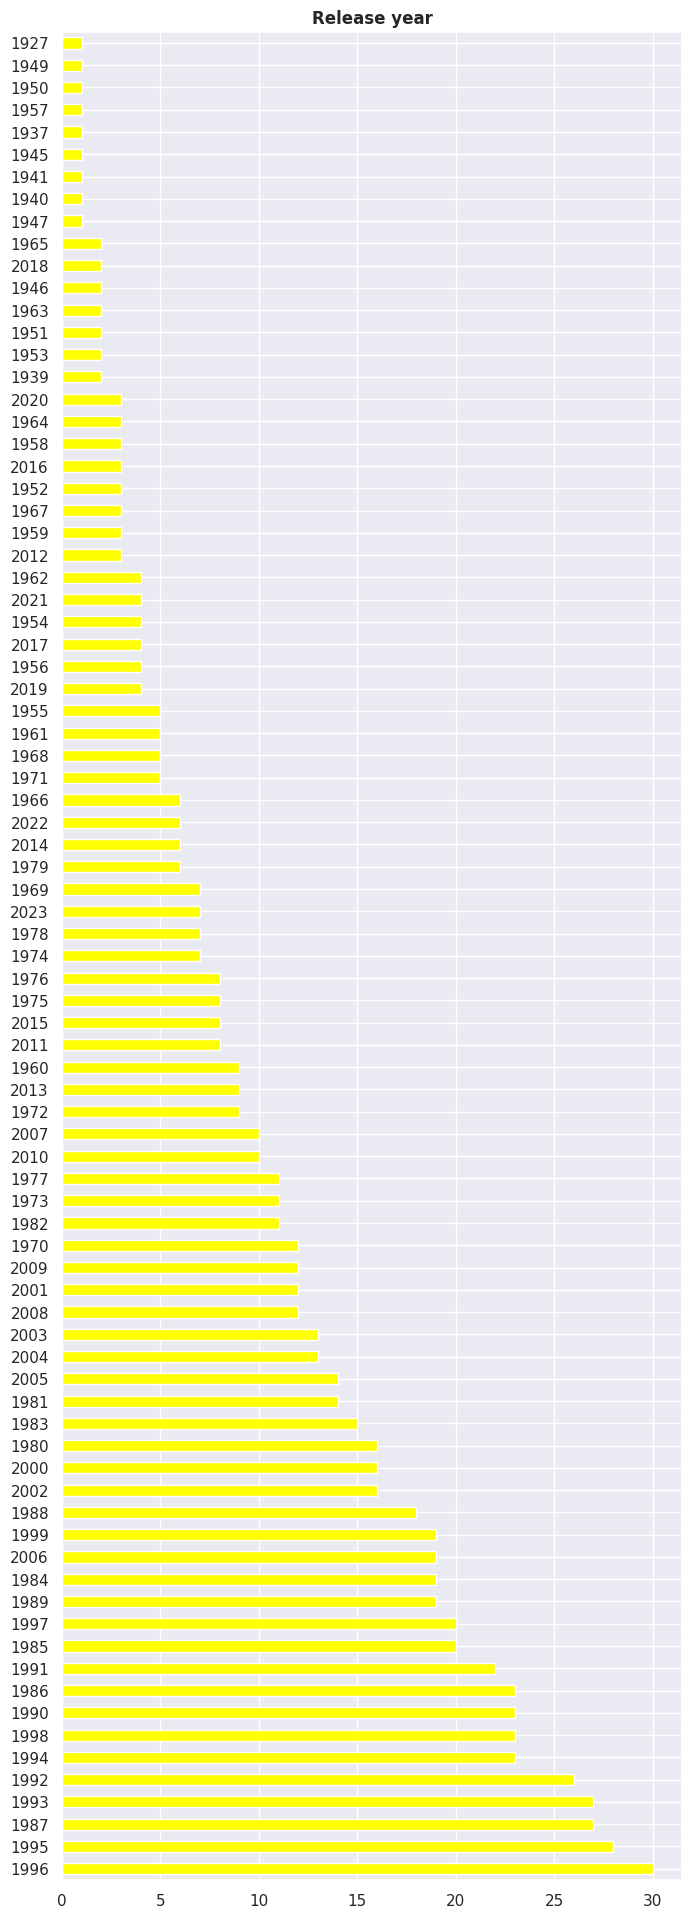

In [16]:
# Displaying distibution of release years in the dataset:
df['Year'].value_counts().plot(kind = 'barh', color = 'yellow', figsize = (8, 24))
plt.ylabel(None)
plt.title('Release year', fontweight = 'bold')
plt.show()

In [17]:
# Classifying the movies by decade they were release in:
def movies_by_decade(year):
  if year >= 1900 and year < 1910:
    result = '1900s'
  elif year >= 1910 and year < 1920:
    result = '1910s'
  elif year >= 1920 and year < 1930:
    result = '1920s'
  elif year >= 1930 and year < 1940:
    result = '1930s'
  elif year >= 1940 and year < 1950:
    result = '1940s'
  elif year >= 1950 and year < 1960:
    result = '1950s'
  elif year >= 1960 and year < 1970:
    result = '1960s'
  elif year >= 1970 and year < 1980:
    result = '1970s'
  elif year >= 1980 and year < 1990:
    result = '1980s'
  elif year >= 1990 and year < 2000:
    result = '1990s'
  elif year >= 2000 and year < 2010:
    result = '2000s'
  elif year >= 2010 and year < 2020:
    result = '2010s'
  elif year >= 2020 and year < 2030:
    result = '2020s'
  else:
    result = 'Unknown'
  return result

# Applying the function above on a column of the dataset and generating a new column as result:
df['Decade'] = df['Year'].apply(movies_by_decade)
df.head()

,Created,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Day Created,Month Created,Year Created,Weekday Created,Decade
0,2024-04-11,The Narrow Margin,movie,7.6,71,1952,"Crime, Drama, Film-Noir, Thriller",8658,1952-04-23,"Richard Fleischer, William Cameron Menzies",11,4,2024,3,1950s
1,2020-04-29,The Great Dictator,movie,8.4,125,1940,"Comedy, Drama, War",237408,1940-10-15,Charles Chaplin,29,4,2020,2,1940s
2,2023-01-31,The Set-Up,movie,7.8,73,1949,"Crime, Film-Noir, Sport",10088,1949-03-29,Robert Wise,31,1,2023,1,1940s
3,2024-04-18,Brian's Song,tvMovie,7.5,73,1971,"Biography, Drama, Sport",8869,1971-11-30,Buzz Kulik,18,4,2024,3,1970s
4,2021-11-07,Cinderella,movie,7.3,74,1950,"Animation, Family, Fantasy, Musical, Romance",174007,1950-02-15,"Hamilton Luske, Clyde Geronimi, Wilfred Jackson",7,11,2021,6,1950s


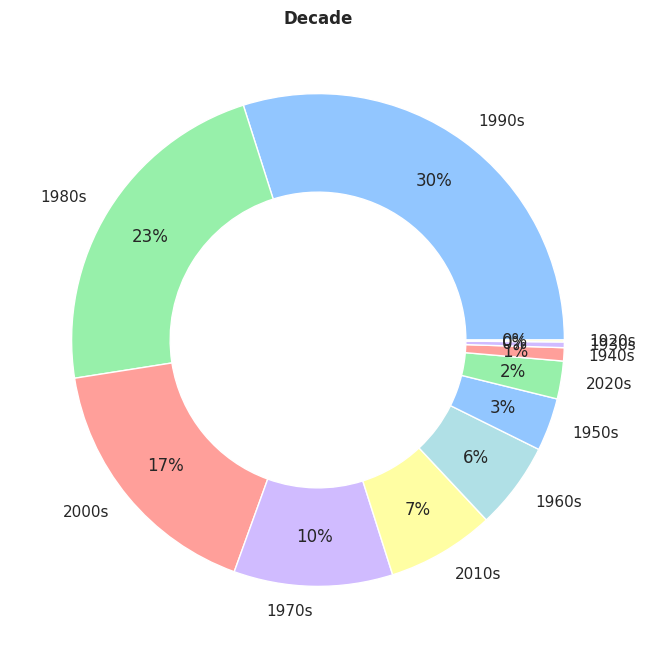

In [18]:
# Displaying the decades the movies are from:
df['Decade'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Decade', fontweight = 'bold')
plt.show()

In [19]:
# Classifying the movies by quality based on their rating:
def imdb_rating(rating):
  if rating >= 9:
    quality = 'Excellent'
  elif rating >= 8 and rating < 9:
    quality = 'Amazing'
  elif rating >= 7 and rating < 8:
    quality = 'Good'
  elif rating >= 6 and rating < 7:
    quality = 'Okay'
  elif rating >= 5 and rating < 6:
    quality = 'Regular'
  elif rating >= 4 and rating < 5:
    quality = 'Bad'
  else:
    quality = 'It sucks!'
  return quality

# Applying the function above on a column of the dataset and generating a new column as result:
df['Quality'] = df['IMDb Rating'].apply(imdb_rating)
df.head()

,Created,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Day Created,Month Created,Year Created,Weekday Created,Decade,Quality
0,2024-04-11,The Narrow Margin,movie,7.6,71,1952,"Crime, Drama, Film-Noir, Thriller",8658,1952-04-23,"Richard Fleischer, William Cameron Menzies",11,4,2024,3,1950s,Good
1,2020-04-29,The Great Dictator,movie,8.4,125,1940,"Comedy, Drama, War",237408,1940-10-15,Charles Chaplin,29,4,2020,2,1940s,Amazing
2,2023-01-31,The Set-Up,movie,7.8,73,1949,"Crime, Film-Noir, Sport",10088,1949-03-29,Robert Wise,31,1,2023,1,1940s,Good
3,2024-04-18,Brian's Song,tvMovie,7.5,73,1971,"Biography, Drama, Sport",8869,1971-11-30,Buzz Kulik,18,4,2024,3,1970s,Good
4,2021-11-07,Cinderella,movie,7.3,74,1950,"Animation, Family, Fantasy, Musical, Romance",174007,1950-02-15,"Hamilton Luske, Clyde Geronimi, Wilfred Jackson",7,11,2021,6,1950s,Good


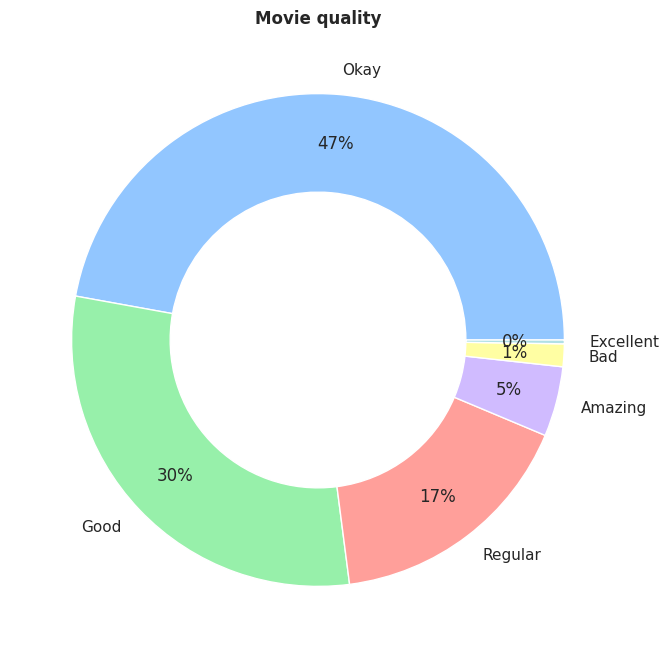

In [20]:
# Displaying the movie rating classification based on the algorithm above:
df['Quality'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Movie quality', fontweight = 'bold')
plt.show()

In [21]:
# Classifying the movies by popularity based on how many people rated them:
def movie_popularity(num_votes):
  if num_votes >= 2000000:
    popularity = 'Over 2M votes'
  elif num_votes >= 1000000 and num_votes < 2000000:
    popularity = 'Over 1M votes'
  elif num_votes >= 500000 and num_votes < 750000:
    popularity = 'Over 500k votes'
  elif num_votes >= 250000 and num_votes < 500000:
    popularity = 'Over 250k votes'
  elif num_votes >= 100000 and num_votes < 250000:
    popularity = 'Over 100k votes'
  elif num_votes >= 10000 and num_votes < 100000:
    popularity = 'Over 10k votes'
  else:
    popularity = 'Less than 10k votes'
  return popularity

# Applying the function above on a column of the dataset and generating a new column as result:
df['Movie popularity'] = df['Num Votes'].apply(movie_popularity)
df.head()

,Created,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Day Created,Month Created,Year Created,Weekday Created,Decade,Quality,Movie popularity
0,2024-04-11,The Narrow Margin,movie,7.6,71,1952,"Crime, Drama, Film-Noir, Thriller",8658,1952-04-23,"Richard Fleischer, William Cameron Menzies",11,4,2024,3,1950s,Good,Less than 10k votes
1,2020-04-29,The Great Dictator,movie,8.4,125,1940,"Comedy, Drama, War",237408,1940-10-15,Charles Chaplin,29,4,2020,2,1940s,Amazing,Over 100k votes
2,2023-01-31,The Set-Up,movie,7.8,73,1949,"Crime, Film-Noir, Sport",10088,1949-03-29,Robert Wise,31,1,2023,1,1940s,Good,Over 10k votes
3,2024-04-18,Brian's Song,tvMovie,7.5,73,1971,"Biography, Drama, Sport",8869,1971-11-30,Buzz Kulik,18,4,2024,3,1970s,Good,Less than 10k votes
4,2021-11-07,Cinderella,movie,7.3,74,1950,"Animation, Family, Fantasy, Musical, Romance",174007,1950-02-15,"Hamilton Luske, Clyde Geronimi, Wilfred Jackson",7,11,2021,6,1950s,Good,Over 100k votes


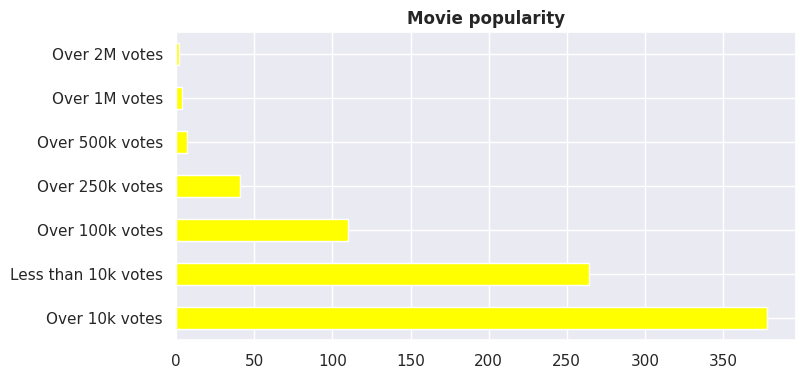

In [22]:
# Displaying the movie popularity based on the algorithm above:
df['Movie popularity'].value_counts().plot(kind = 'barh', color = 'yellow', figsize = (8, 4))
plt.ylabel(None)
plt.title('Movie popularity', fontweight = 'bold')
plt.show()

In [23]:
# Classifying the movies by duration based on their runtime:
def movie_duration(runtime):
  if runtime >= 180:
    duration = 'Over 3h'
  elif runtime >= 150 and runtime < 180:
    duration = 'Between 2h30 and 2h59'
  elif runtime >= 120 and runtime < 150:
    duration = 'Between 2h and 2h29'
  elif runtime >= 100 and runtime < 120:
    duration = 'Between 1h40 and 1h59'
  elif runtime >= 90 and runtime < 100:
    duration = 'Between 1h30 and 1h39'
  elif runtime >= 70 and runtime < 90:
    duration = 'Between 1h10 and 1h29'
  else:
    duration = 'Shorter than 70 minutes'
  return duration

# Applying the function above on a column of the dataset and generating a new column as result:
df['Movie duration'] = df['Runtime (mins)'].apply(movie_duration)
df.head()

,Created,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Day Created,Month Created,Year Created,Weekday Created,Decade,Quality,Movie popularity,Movie duration
0,2024-04-11,The Narrow Margin,movie,7.6,71,1952,"Crime, Drama, Film-Noir, Thriller",8658,1952-04-23,"Richard Fleischer, William Cameron Menzies",11,4,2024,3,1950s,Good,Less than 10k votes,Between 1h10 and 1h29
1,2020-04-29,The Great Dictator,movie,8.4,125,1940,"Comedy, Drama, War",237408,1940-10-15,Charles Chaplin,29,4,2020,2,1940s,Amazing,Over 100k votes,Between 2h and 2h29
2,2023-01-31,The Set-Up,movie,7.8,73,1949,"Crime, Film-Noir, Sport",10088,1949-03-29,Robert Wise,31,1,2023,1,1940s,Good,Over 10k votes,Between 1h10 and 1h29
3,2024-04-18,Brian's Song,tvMovie,7.5,73,1971,"Biography, Drama, Sport",8869,1971-11-30,Buzz Kulik,18,4,2024,3,1970s,Good,Less than 10k votes,Between 1h10 and 1h29
4,2021-11-07,Cinderella,movie,7.3,74,1950,"Animation, Family, Fantasy, Musical, Romance",174007,1950-02-15,"Hamilton Luske, Clyde Geronimi, Wilfred Jackson",7,11,2021,6,1950s,Good,Over 100k votes,Between 1h10 and 1h29


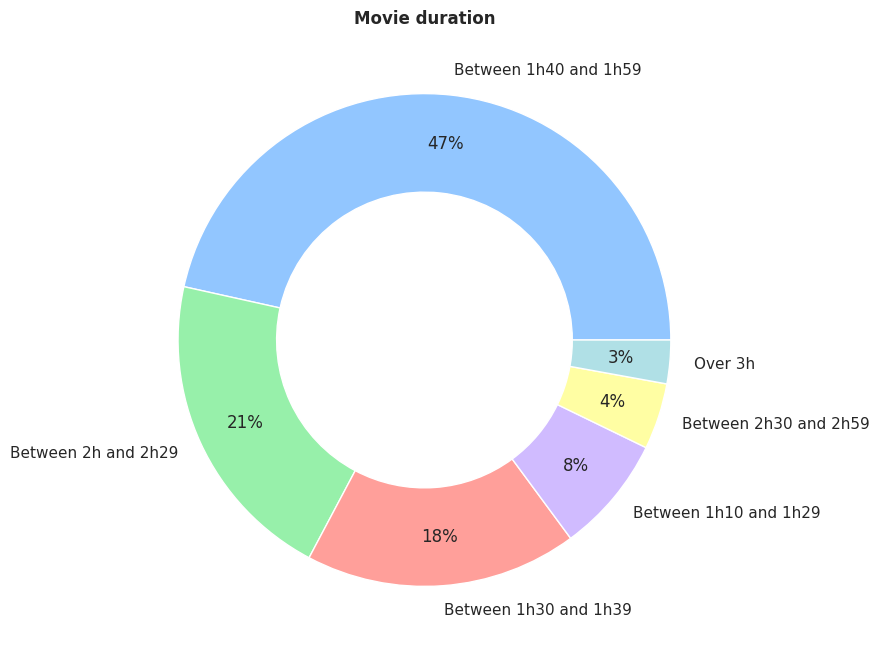

In [24]:
# Displaying the movie duration based on the algorithm above:
df['Movie duration'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Movie duration', fontweight = 'bold')
plt.show()

In [25]:
# Classifying the movies by year quartile added based on the month they were added to the dataset:
def year_quartile(month):
  if month >= 1 and month <= 3:
    quartile = 'First'
  elif month >= 4 and month <= 6:
    quartile = 'Second'
  elif month >= 7 and month <= 9:
    quartile = 'Third'
  else:
    quartile = 'Fourth'
  return quartile

# Applying the function above on a column of the dataset and generating a new column as result:
df['Quartile Added'] = df['Month Created'].apply(year_quartile)
df.head()

,Created,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Day Created,Month Created,Year Created,Weekday Created,Decade,Quality,Movie popularity,Movie duration,Quartile Added
0,2024-04-11,The Narrow Margin,movie,7.6,71,1952,"Crime, Drama, Film-Noir, Thriller",8658,1952-04-23,"Richard Fleischer, William Cameron Menzies",11,4,2024,3,1950s,Good,Less than 10k votes,Between 1h10 and 1h29,Second
1,2020-04-29,The Great Dictator,movie,8.4,125,1940,"Comedy, Drama, War",237408,1940-10-15,Charles Chaplin,29,4,2020,2,1940s,Amazing,Over 100k votes,Between 2h and 2h29,Second
2,2023-01-31,The Set-Up,movie,7.8,73,1949,"Crime, Film-Noir, Sport",10088,1949-03-29,Robert Wise,31,1,2023,1,1940s,Good,Over 10k votes,Between 1h10 and 1h29,First
3,2024-04-18,Brian's Song,tvMovie,7.5,73,1971,"Biography, Drama, Sport",8869,1971-11-30,Buzz Kulik,18,4,2024,3,1970s,Good,Less than 10k votes,Between 1h10 and 1h29,Second
4,2021-11-07,Cinderella,movie,7.3,74,1950,"Animation, Family, Fantasy, Musical, Romance",174007,1950-02-15,"Hamilton Luske, Clyde Geronimi, Wilfred Jackson",7,11,2021,6,1950s,Good,Over 100k votes,Between 1h10 and 1h29,Fourth


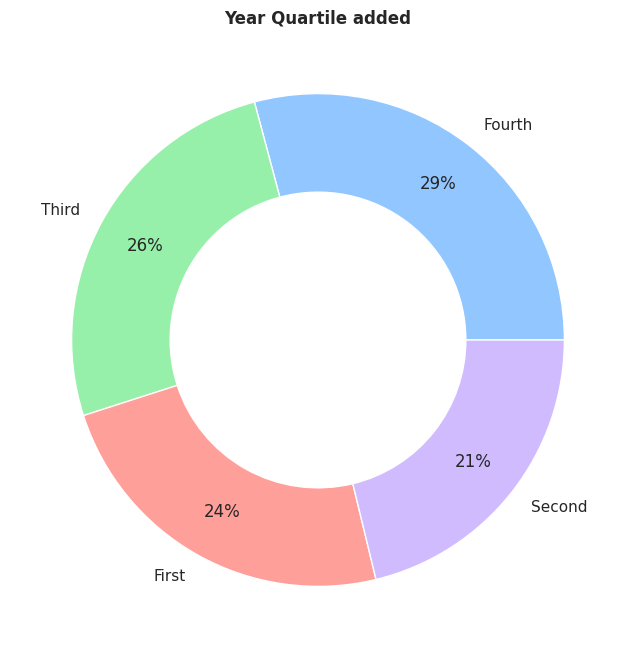

In [26]:
# Displaying the quartile the movie was added based on the algorithm above:
df['Quartile Added'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Year Quartile added', fontweight = 'bold')
plt.show()

In [27]:
# Classifying the movies by the month half added based on the day they were added to the dataset:
def month_half(day):
  if day >= 1 and day <= 15:
    half = 'First'
  else:
    half = 'Second'
  return half

# Applying the function above on a column of the dataset and generating a new column as result:
df['Month Half Added'] = df['Day Created'].apply(month_half)
df.head()

,Created,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Day Created,Month Created,Year Created,Weekday Created,Decade,Quality,Movie popularity,Movie duration,Quartile Added,Month Half Added
0,2024-04-11,The Narrow Margin,movie,7.6,71,1952,"Crime, Drama, Film-Noir, Thriller",8658,1952-04-23,"Richard Fleischer, William Cameron Menzies",11,4,2024,3,1950s,Good,Less than 10k votes,Between 1h10 and 1h29,Second,First
1,2020-04-29,The Great Dictator,movie,8.4,125,1940,"Comedy, Drama, War",237408,1940-10-15,Charles Chaplin,29,4,2020,2,1940s,Amazing,Over 100k votes,Between 2h and 2h29,Second,Second
2,2023-01-31,The Set-Up,movie,7.8,73,1949,"Crime, Film-Noir, Sport",10088,1949-03-29,Robert Wise,31,1,2023,1,1940s,Good,Over 10k votes,Between 1h10 and 1h29,First,Second
3,2024-04-18,Brian's Song,tvMovie,7.5,73,1971,"Biography, Drama, Sport",8869,1971-11-30,Buzz Kulik,18,4,2024,3,1970s,Good,Less than 10k votes,Between 1h10 and 1h29,Second,Second
4,2021-11-07,Cinderella,movie,7.3,74,1950,"Animation, Family, Fantasy, Musical, Romance",174007,1950-02-15,"Hamilton Luske, Clyde Geronimi, Wilfred Jackson",7,11,2021,6,1950s,Good,Over 100k votes,Between 1h10 and 1h29,Fourth,First


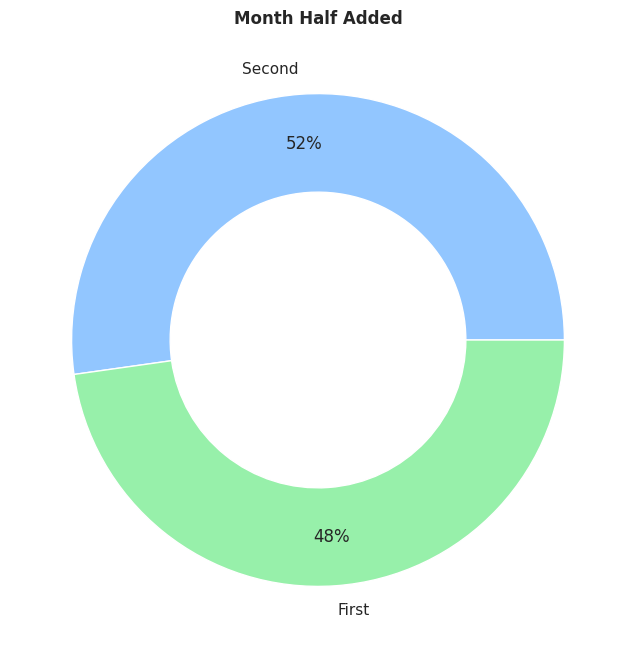

In [28]:
# Displaying the month half the movie was added based on the algorithm above:
df['Month Half Added'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Month Half Added', fontweight = 'bold')
plt.show()

In [41]:
# Creating a list of genres:
genre_list = pd.DataFrame({'Genres' : [
              'Action','Animation', 'Biography',
              'Comedy', 'Crime', 'Drama',
              'Documentary', 'Family', 'Fantasy',
              'Film-Noir', 'History', 'Horror',
              'Mystery', 'Music', 'Musical',
              'Romance', 'Sci-Fi', 'Sport',
              'Thriller', 'War', 'Western']})

# Splitting the genres by comma and removing leading spaces:
df['Genres'] = df['Genres'].str.split(',').apply(lambda x : [i.strip() for i in x])

# Exploding the list into separate rows:
df = df.explode('Genres')

# Counting Matrix using crosstab method:
genre_counts = pd.crosstab(index = df.index, columns = df['Genres'], margins = False).to_dict('index')
genre_counts = pd.DataFrame(genre_counts)

# Counting the number of 0s and 1s in each row:
counts = (genre_counts.apply(lambda row : [sum(row == 0), sum(row == 1)], axis = 1))

In [42]:
# Defining and displaying the final count with 2 columns ('False' and 'True'):
counts = pd.DataFrame(counts.tolist(), index = counts.index, columns = ['False', 'True'])
print(counts)

             False  True
Action         674   132
Adventure      683   123
Animation      787    19
Biography      731    75
Comedy         520   286
Crime          656   150
Documentary    800     6
Drama          242   564
Family         723    83
Fantasy        746    60
Film-Noir      802     4
History        758    48
Horror         784    22
Music          765    41
Musical        779    27
Mystery        745    61
Romance        603   203
Sci-Fi         744    62
Sport          752    54
Thriller       651   155
War            752    54
Western        777    29


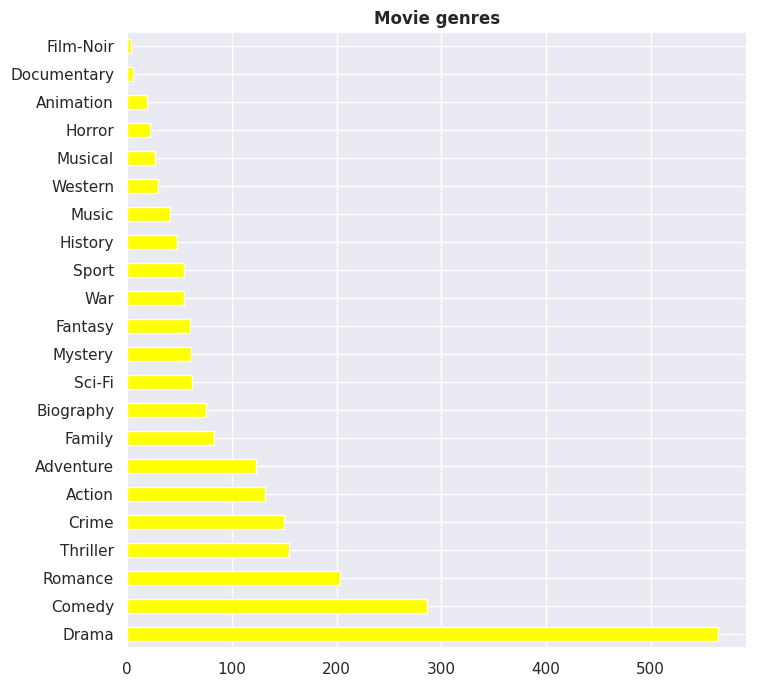

In [43]:
# Displaying the proportions of the movie genres present in the dataset:
counts['True'].sort_values(ascending = False).plot(kind = 'barh', color = 'yellow', figsize = (8, 8))
plt.ylabel(None)
plt.title('Movie genres', fontweight = 'bold')
plt.show()

In [46]:
# Displaying the datatypes of each column:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2258 entries, 0 to 805
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Created           2258 non-null   datetime64[ns]
 1   Title             2258 non-null   object        
 2   Title Type        2258 non-null   object        
 3   IMDb Rating       2258 non-null   float64       
 4   Runtime (mins)    2258 non-null   int64         
 5   Year              2258 non-null   int64         
 6   Genres            2258 non-null   object        
 7   Num Votes         2258 non-null   int64         
 8   Release Date      2258 non-null   datetime64[ns]
 9   Directors         2244 non-null   object        
 10  Day Created       2258 non-null   int64         
 11  Month Created     2258 non-null   int64         
 12  Year Created      2258 non-null   int64         
 13  Weekday Created   2258 non-null   int64         
 14  Decade            2258 non-nul

In [49]:
df = df[df['Directors'].apply(lambda x: isinstance(x, str))]

# Splitting the directors by comma and removing leading spaces:
df['Directors'] = df['Directors'].str.split(',').apply(lambda x : [i.strip() for i in x])

# Exploding the list into separate rows:
df = df.explode('Directors')

# Counting Matrix using crosstab method:
directors_counts = pd.crosstab(index = df.index, columns = df['Directors'], margins = False).to_dict('index')
directors_counts = pd.DataFrame(directors_counts)

# Counting the number of 0s and 1s in each row:
final_directors_counts = (directors_counts.apply(lambda row : [sum(row == 0), sum(row == 1)], axis = 1))

In [50]:
# Defining and displaying the final count with 2 columns ('False' and 'True'):
final_directors_counts = pd.DataFrame(final_directors_counts.tolist(), index = final_directors_counts.index, columns = ['False', 'True'])
print(final_directors_counts)

                     False  True
Adrian Lyne            800     0
Alan Parker            801     0
Alan Rudolph           801     0
Alan Shapiro           801     0
Albert Band            801     0
...                    ...   ...
Wolfgang Reitherman    799     0
Woody Allen            800     0
Yves Simoneau          801     0
Zoltan Korda           801     1
Ã‰lie Chouraqui        801     0

[605 rows x 2 columns]


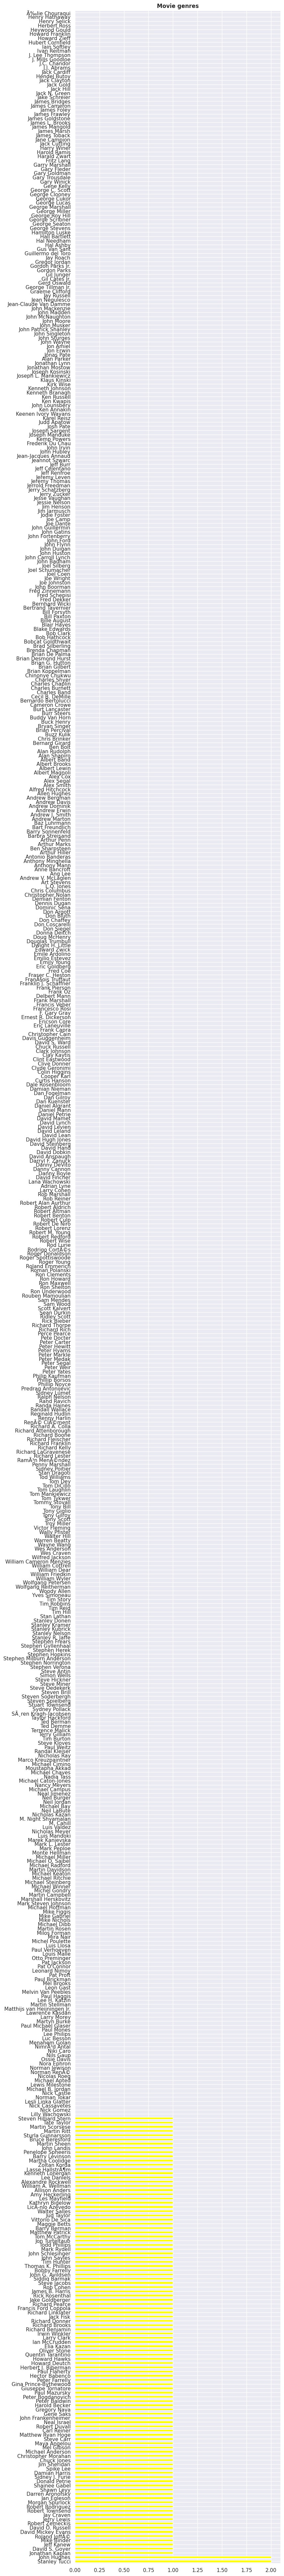

In [55]:
# Displaying the proportions of the directors present in the dataset:
final_directors_counts['True'].sort_values(ascending = False).plot(kind = 'barh', color = 'yellow', figsize = (8, 100))
plt.ylabel(None)
plt.title('Movie genres', fontweight = 'bold')
plt.show()